In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from GACPD.GACPD import  GACPD

In [3]:
token_list = []
token_file = 'tokens.txt'

if not os.path.exists("reports"):
    os.mkdir("reports")

if not os.path.exists("src"):
    os.mkdir("src")

if not os.path.exists("cmp"):
    os.mkdir("cmp")

print(os.getcwd())

with open(token_file, 'r') as f:
    for line in f.readlines():
        token_list.append(line.strip('\n'))

/home/gonzalo/Desktop/GACPD


In [4]:
data = ('9999', 'apache/kafka', 'linkedin/kafka', token_list, '', '')

In [5]:
example = GACPD(data)

In [6]:
example.get_dates()

The divergence_date of the repository linkedin/kafka is 2022-06-02T17:08:43Z and the cut_off_date is 2025-07-08T04:24:59Z.
The variant2 is ==>
	 Ahead by 471 patches
	 Behind by 6833 patches
Select an interval within the period [2022-06-02T17:08:43Z, 2025-07-08T04:24:59Z] to limit the patches being checked.


In [7]:
# prs_source = example.extractPatches('2018-08-28T17:08:43Z', '2022-06-02T17:08:43Z')
prs_source = example.extractPatches('2022-06-02T17:08:43Z', '2022-06-18T17:08:43Z')

Extracting patches between 2022-06-02T17:08:43Z and 2022-06-18T17:08:43Z...
Not outputting obtained issues - just getting issue count
12295,2022-06-15T01:24:08Z,KAFKA-13586: Prevent exception thrown during connector update from crashing distributed herder
12290,2022-06-14T01:10:33Z,MINOR: Stop leaking threads in BlockingConnectorTest
12289,2022-06-13T22:16:05Z,KAFKA-13957: Fix flaky shouldQuerySpecificActivePartitionStores test
12288,2022-06-13T22:07:41Z,HOTFIX: null check for ProducerRecord when computing sizeInBytes
12280,2022-06-10T03:30:41Z,MINOR: Reuse gradle daemon for scala compilation by default
12268,2022-06-08T17:10:51Z,[MINOR] Fix typo
12265,2022-06-08T07:11:49Z,KAFKA-13968: Fix 3 major bugs of KRaft snapshot generating
12262,2022-06-07T18:40:42Z,KAFKA-13942: Fix kraft timeout in LogOffsetTest
12259,2022-06-06T21:44:51Z,HOTFIX: only try to clear discover-coordinator future upon commit
12253,2022-06-06T00:07:05Z,MINOR: A fewer method javadoc and typo fix
12252,2022-06-04T19:3

# Done. Printed 15 PRs.


In [8]:
example.dfPatches()

,Patch number,Patch title
0,12295,KAFKA-13586: Prevent exception thrown during c...
1,12290,MINOR: Stop leaking threads in BlockingConnect...
2,12289,KAFKA-13957: Fix flaky shouldQuerySpecificActi...
3,12288,HOTFIX: null check for ProducerRecord when com...
4,12280,MINOR: Reuse gradle daemon for scala compilati...
5,12268,[MINOR] Fix typo
6,12265,KAFKA-13968: Fix 3 major bugs of KRaft snapsho...
7,12262,KAFKA-13942: Fix kraft timeout in LogOffsetTest
8,12259,HOTFIX: only try to clear discover-coordinator...
9,12253,MINOR: A fewer method javadoc and typo fix


Fetching files and commit information from patches...
---64.06680083274841 seconds ---


Cloning into 'kafka'...
Cloning into 'kafka'...


Repository created at: 2018-08-31T21:32:03Z

Starting classification for apache/kafka, - , linkedin/kafka...
[{'status': 'modified', 'additions': 3, 'deletions': 5, 'changes': 8, 'patch': '@@ -660,6 +660,7 @@ private void processConnectorConfigUpdates(Set<String> connectorConfigUpdates) {\n         // If we only have connector config updates, we can just bounce the updated connectors that are\n         // currently assigned to this worker.\n         Set<String> localConnectors = assignment == null ? Collections.emptySet() : new HashSet<>(assignment.connectors());\n+        Collection<Callable<Void>> connectorsToStart = new ArrayList<>();\n         log.trace("Processing connector config updates; "\n                 + "currently-owned connectors are {}, and to-be-updated connectors are {}",\n                 localConnectors,\n@@ -676,13 +677,10 @@ private void processConnectorConfigUpdates(Set<String> connectorConfigUpdates) {\n             worker.stopAndAwaitConnector(connectorName);\n 

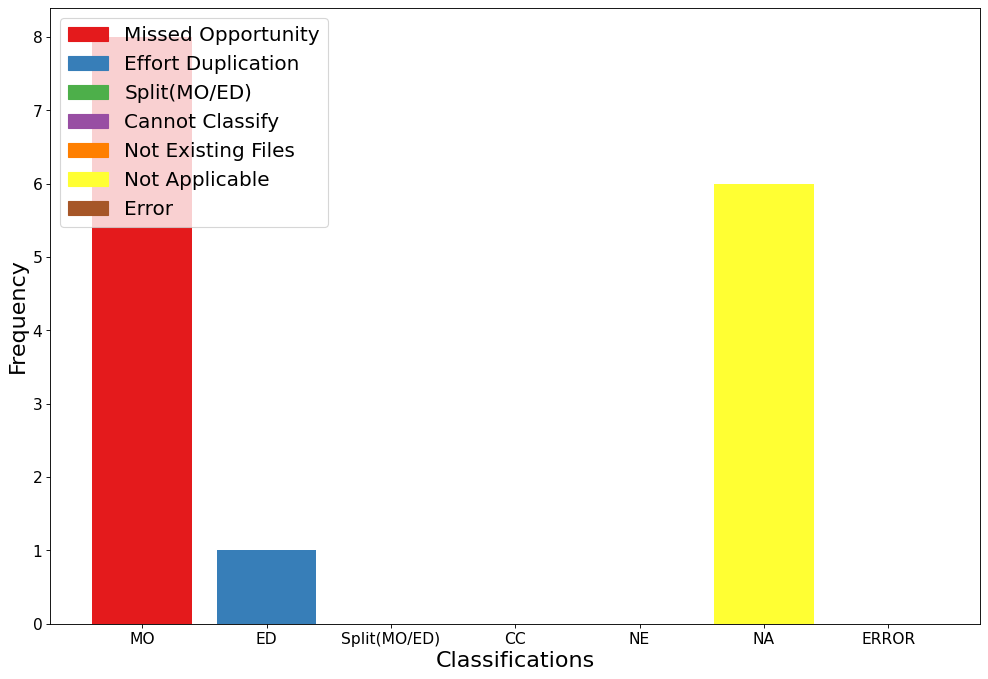

In [9]:
example.runClassification(prs_source)

In [10]:
# example.dfPatchClass().to_csv('results-50-40-30-fullAll.csv')
# example.dfFileClass()
# example.dfFileClass().to_csv('GACPD-50-40-30-fullAll.csv')

In [11]:
for i in range(0, len(example.cycles)):
    print(example.cycles[i])

['streams/src/test/java/org/apache/kafka/streams/state/internals/SegmentIteratorTest.java', 'streams/src/test/java/org/apache/kafka/streams/state/internals/KeyValueSegmentIteratorTest.java', 'streams/src/test/java/org/apache/kafka/streams/state/internals/SegmentIteratorTest.java']
['core/src/main/scala/kafka/server/BrokerToControllerChannelManager.scala', 'core/src/main/scala/kafka/server/BrokerToControllerChannelManagerImpl.scala', 'core/src/main/scala/kafka/server/BrokerToControllerChannelManager.scala']


In [12]:
example.create_dynamic_js()
# TO view results run this on the terminal: python3 -m http.server 8000
# TO end server session just ctrl + c

✅ JavaScript file written to: dynamic_boxes.js
